In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [69]:
Sales_data = pd.read_csv(r"C:\Users\Padma Jothi\Desktop\Capstone\MDTM017 & MDTM18\sales_data_set.csv")
#Merging with Sales Dataset
Feat_sales = pd.read_csv(r"C:\Users\Padma Jothi\Desktop\Capstone\MDTM017 & MDTM18\Features_data_set.csv")
combined_df = pd.merge(Sales_data,Feat_sales.drop(['IsHoliday'],axis=1),how='left',on=['Store','Date'])
# Merging Store_data with the sales data
Store_data = pd.read_csv(r"C:\Users\Padma Jothi\Desktop\Capstone\MDTM017 & MDTM18\stores_data_set.csv")
merged_df = pd.merge(combined_df,Store_data,how='left',on=['Store'])
merged_df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,05/02/2010,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,12/02/2010,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,19/02/2010,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,26/02/2010,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,05/03/2010,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,28/09/2012,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,B,118221
421566,45,98,05/10/2012,628.10,False,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,B,118221
421567,45,98,12/10/2012,1061.02,False,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,B,118221
421568,45,98,19/10/2012,760.01,False,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,B,118221


In [70]:
merged_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,05/02/2010,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,12/02/2010,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,19/02/2010,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,26/02/2010,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,05/03/2010,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


In [86]:
merged_df.to_csv('Sales_data.csv',index=False)

In [71]:
merged_df.shape

(421570, 16)

In [72]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  Type          421570 non-null  object 
 15  Size          421570 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 48.6+ MB


In [73]:
merged_df.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64

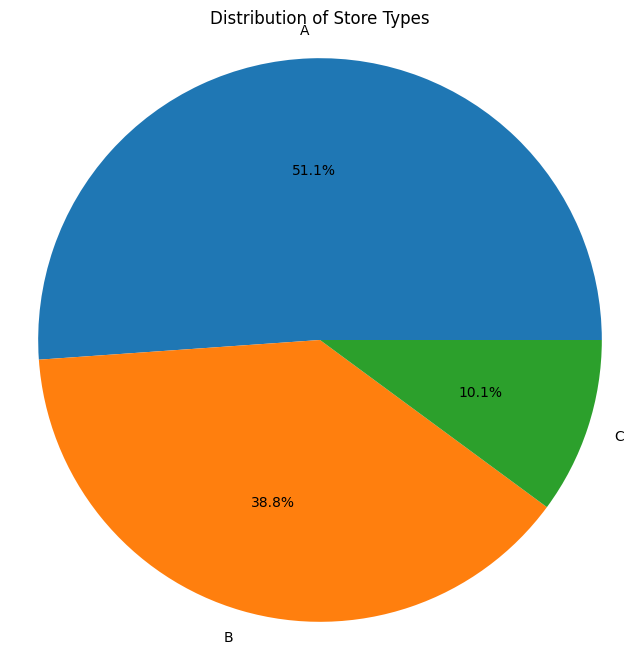

In [74]:
store_types = merged_df['Type'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(store_types, labels=store_types.index, autopct='%1.1f%%')
plt.title('Distribution of Store Types')
plt.axis('equal')
plt.show()

## Converting Numeric Values

In [75]:
merged_df.dtypes

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
Type             object
Size              int64
dtype: object

In [76]:
merged_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,421570.0,22.200546,12.785297,1.000,11.000000,22.00000,33.000000,45.000000
Dept,421570.0,44.260317,30.492054,1.000,18.000000,37.00000,74.000000,99.000000
Weekly_Sales,421570.0,15981.258123,22711.183519,-4988.940,2079.650000,7612.03000,20205.852500,693099.360000
Temperature,421570.0,60.090059,18.447931,-2.060,46.680000,62.09000,74.280000,100.140000
Fuel_Price,421570.0,3.361027,0.458515,2.472,2.933000,3.45200,3.738000,4.468000
MarkDown1,150681.0,7246.420196,8291.221345,0.270,2240.270000,5347.45000,9210.900000,88646.760000
MarkDown2,111248.0,3334.628621,9475.357325,-265.760,41.600000,192.00000,1926.940000,104519.540000
MarkDown3,137091.0,1439.421384,9623.078290,-29.100,5.080000,24.60000,103.990000,141630.610000
MarkDown4,134967.0,3383.168256,6292.384031,0.220,504.220000,1481.31000,3595.040000,67474.850000
MarkDown5,151432.0,4628.975079,5962.887455,135.160,1878.440000,3359.45000,5563.800000,108519.280000


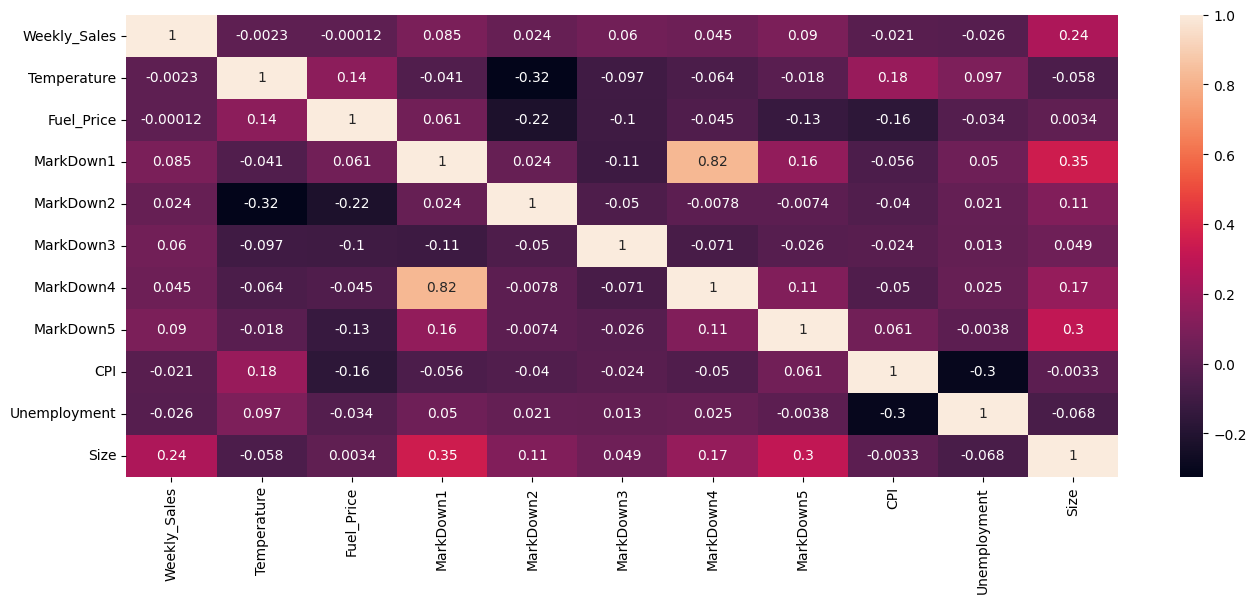

In [77]:
x = merged_df[['Weekly_Sales','Temperature','Fuel_Price','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','CPI','Unemployment','Size']].corr()
plt.figure(figsize=(16,6))
sns.heatmap(x,annot= True)
plt.show()

## Fill NA Values 

### Fill Markdown NA values with '0'

In [78]:
#merged_df['MarkDown1'].fillna(0, inplace=True)
#merged_df['MarkDown2'].fillna(0, inplace=True)
#merged_df['MarkDown3'].fillna(0, inplace=True)
#merged_df['MarkDown4'].fillna(0, inplace=True)
#merged_df['MarkDown5'].fillna(0, inplace=True)

In [79]:
markdown_features = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
for feature in markdown_features:
    merged_df[feature].fillna(0, inplace=True)

In [80]:
merged_df.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
dtype: int64

## Data Preprocessing

In [81]:
merged_df['Date'] = pd.to_datetime(merged_df['Date'],dayfirst=True)
merged_df['Month'] = merged_df['Date'].dt.month
merged_df['Day_Of_Week'] = merged_df['Date'].dt.dayofweek
merged_df['Year'] = merged_df['Date'].dt.year
merged_df['Week'] = merged_df['Date'].dt.isocalendar().week

In [82]:
merged_df.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
Type                    object
Size                     int64
Month                    int32
Day_Of_Week              int32
Year                     int32
Week                    UInt32
dtype: object

## Encoding

In [83]:
df_encoded = pd.get_dummies(merged_df[['IsHoliday','Type']],drop_first=True)   

## Scaler

In [84]:
X = merged_df[['Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Size', 'Type_B', 'Type_C', 'IsHoliday_True']]
y = merged_df[['Weekly_Sales']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3,random_state=42)

KeyError: "['Type_B', 'Type_C', 'IsHoliday_True'] not in index"

## Model Fitting

In [ ]:
xgb_regressor = XGBRegressor(learning_rate=0.1,n_estimators=100,max_depth=6,objective='reg:linear',gamma=0)
xgb_regressor.fit(X_train,y_train)
y_pred = xgb_regressor.predict(X_test)

MSE = mean_absolute_error(y_test,y_pred=y_pred)
RMSE = np.sqrt(mean_squared_error(y_true=y_test,y_pred=y_pred))
R2 = r2_score(y_test,y_pred)

print(f"Mean Absolute Error (MSE) : {MSE}")
print(f"Root Mean Squared Error (RMSE): {RMSE}")
print(f"R2 (R2): {R2}")

Mean Absolute Error (MSE) : 14268.503427636851
Root Mean Squared Error (RMSE): 21709.401038774045
R2 (R2): 0.09311667281858593
